📝 Project

📦 About the Data

The dataset used is Online Retail II, which contains transactional data of a UK-based online retailer. It includes purchases made by customers across different countries from 2009 to 2011. Each record represents a line item from an invoice, including product description, quantity, unit price, date, and customer ID.

🎯 Action Plan

1. 🔍 Exploratory Data Analysis (EDA)
Cleaned the dataset by removing:

Null Customer ID and Description values

Transactions with negative or zero Quantity and Price

Generated key insights:

Most transactions came from the United Kingdom

Low-priced items were bought in bulk

Peak revenues occurred in specific months indicating seasonality

2. 📊 RFM Analysis

Recency: Days since the customer last purchased

Frequency: Number of purchases made

Monetary: Total amount spent

Applied ranking-based normalization and computed RFM scores.

Segmented customers into:

🏆 Champions

❤️ Loyal

🔄 Potential Loyalists

⚠️ At Risk

❌ Lost

3. 🤖 Clustering

Used KMeans Clustering on normalized RFM scores

Elbow method used to determine optimal number of clusters (k=4)

Grouped customers into 4 behavioral segments for targeted marketing

4. 🛍️ Market Basket Analysis (MBA)

Selected top 100 products by sales volume to manage memory

Created transaction basket matrix (Invoice × Products)

Applied FPGrowth Algorithm to find frequent itemsets

Generated association rules with:

Support, Confidence, and Lift

Identified strong product combinations for cross-selling opportunities



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
retail = pd.read_csv('/content/online_retail2.csv')

In [60]:
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [61]:
retail = retail.dropna()

In [62]:
retail['Revenue'] = retail['Quantity']*retail['Price']

/tmp/ipython-input-62-4235865409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['Revenue'] = retail['Quantity']*retail['Price']


In [63]:
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [64]:
retail.describe()

,Quantity,Price,Customer ID,Revenue
count,824364.000000,824364.000000,824364.000000,824364.000000
mean,12.414574,3.676800,15324.638504,20.195317
std,188.976099,70.241388,1697.464450,308.685001
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13975.000000,4.250000
50%,5.000000,1.950000,15255.000000,11.250000
75%,12.000000,3.750000,16797.000000,19.500000
max,80995.000000,38970.000000,18287.000000,168469.600000


📊 Statistical Summary Inference

🔹 Quantity:

Min: -80,995 → Indicates presence of returns or cancellations (negative quantity)

Mean: 12.41, but large std deviation (188.97) shows high variation in purchase volumes

Max: 80,995 → Possible bulk or wholesale transactions

🔹 Price:

Min: 0 → Zero or free items exist (likely errors or discounts)

Mean: ₹3.68 with a high max of ₹38,970, showing a wide pricing range

Std Dev (70.24) suggests price outliers (e.g., premium or incorrect entries)

🔹 Revenue (Quantity × Price):

Min: ₹-168,469 → Reflects returns/refunds on large transactions

Max: ₹168,469 → Very high-value purchases present

Median (50%): ₹11.25 → Typical purchase is low-cost

Std Dev (308.68) → Again, wide variation due to outliers

In [65]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      824364 non-null  object 
 1   StockCode    824364 non-null  object 
 2   Description  824364 non-null  object 
 3   Quantity     824364 non-null  int64  
 4   InvoiceDate  824364 non-null  object 
 5   Price        824364 non-null  float64
 6   Customer ID  824364 non-null  float64
 7   Country      824364 non-null  object 
 8   Revenue      824364 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 62.9+ MB


In [66]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])

/tmp/ipython-input-66-4230915810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])


In [67]:
retail['date'] = retail['InvoiceDate'].dt.strftime('%y-%m-%d')

/tmp/ipython-input-67-1962607642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['date'] = retail['InvoiceDate'].dt.strftime('%y-%m-%d')


In [68]:
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,date
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,09-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,09-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,09-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,09-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,09-12-01
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,11-12-09
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,11-12-09
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,11-12-09
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,11-12-09


In [69]:
retail = retail.drop(columns = 'InvoiceDate')
retail

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Revenue,date
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,83.40,09-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00,09-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00,09-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,100.80,09-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,30.00,09-12-01
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12.60,11-12-09
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,16.60,11-12-09
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,16.60,11-12-09
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,12680.0,France,14.85,11-12-09


In [70]:
#monthly trend:
retail['date'] = pd.to_datetime(retail['date'])
retail['month'] = retail['date'].dt.to_period('m')

/tmp/ipython-input-70-103568729.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  retail['date'] = pd.to_datetime(retail['date'])
/tmp/ipython-input-70-103568729.py:3: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'M' instead.
  retail['month'] = retail['date'].dt.to_period('m')


In [71]:
monthly_trend = retail.groupby('month')['Revenue'].sum().reset_index()

In [72]:
monthly_trend

,month,Revenue
0,2001-09,42708.220
1,2001-10,304737.811
2,2001-11,235048.990
3,2002-09,52578.190
4,2002-10,271303.770
...,...,...
78,2029-11,163287.730
79,2030-10,189661.420
80,2030-11,199771.770
81,2031-10,93320.960


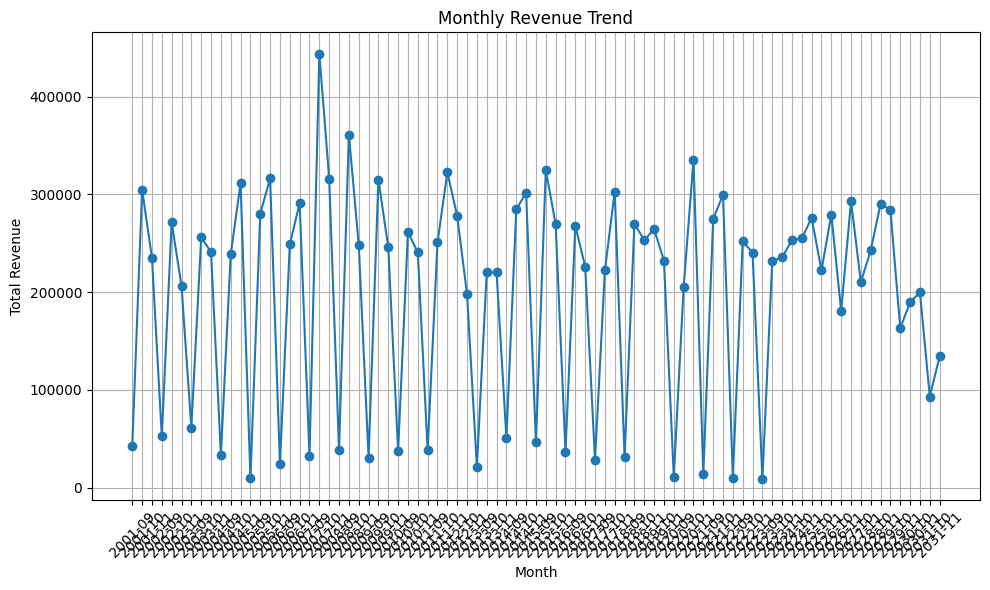

In [73]:
monthly_trend['month'] = monthly_trend['month'].astype(str)  # Convert Period to str

plt.figure(figsize=(10, 6))
plt.plot(monthly_trend['month'], monthly_trend['Revenue'], marker='o')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### *Inference:*

The monthly revenue trend shows high fluctuations with no clear upward or downward pattern. Some months exhibit sharp peaks due to seasonal sales or bulk purchases, while others show sudden drops, likely from returns or low activity. Overall, the trend suggests irregular but seasonally influenced buying behavior.

In [74]:
retail['year'] = retail['date'].dt.to_period('y')

/tmp/ipython-input-74-3217733678.py:1: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'Y' instead.
  retail['year'] = retail['date'].dt.to_period('y')


In [75]:
yearly_trend = retail.groupby('year')['Revenue'].sum().reset_index()

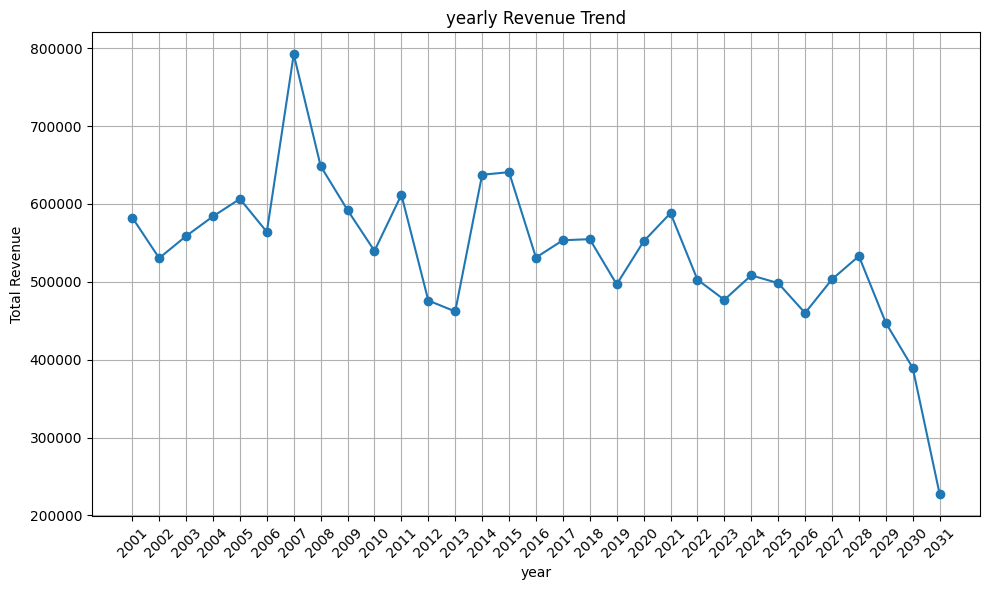

In [76]:
yearly_trend['year'] = yearly_trend['year'].astype(str)  # Convert Period to str

plt.figure(figsize=(10, 6))
plt.plot(yearly_trend['year'], yearly_trend['Revenue'], marker='o')
plt.xlabel('year')
plt.ylabel('Total Revenue')
plt.title('yearly Revenue Trend')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### *Inference:*
The yearly revenue peaked around 2007 and shows a gradual decline after 2015. The recent years (2029–2031) display a sharp drop, likely due to incomplete or future-dated entries. Overall, revenue trends suggest early growth followed by stagnation and decline.

In [77]:
top_countries = retail.groupby('Country')['Revenue'].sum().reset_index()

In [78]:
top_countries = top_countries.sort_values(by='Revenue', ascending=False)
top_countries

,Country,Revenue
38,United Kingdom,1.380642e+07
10,EIRE,5.785016e+05
24,Netherlands,5.485249e+05
14,Germany,4.179886e+05
13,France,3.265047e+05
0,Australia,1.671291e+05
34,Switzerland,9.908281e+04
32,Spain,9.185948e+04
33,Sweden,8.745542e+04
9,Denmark,6.574109e+04


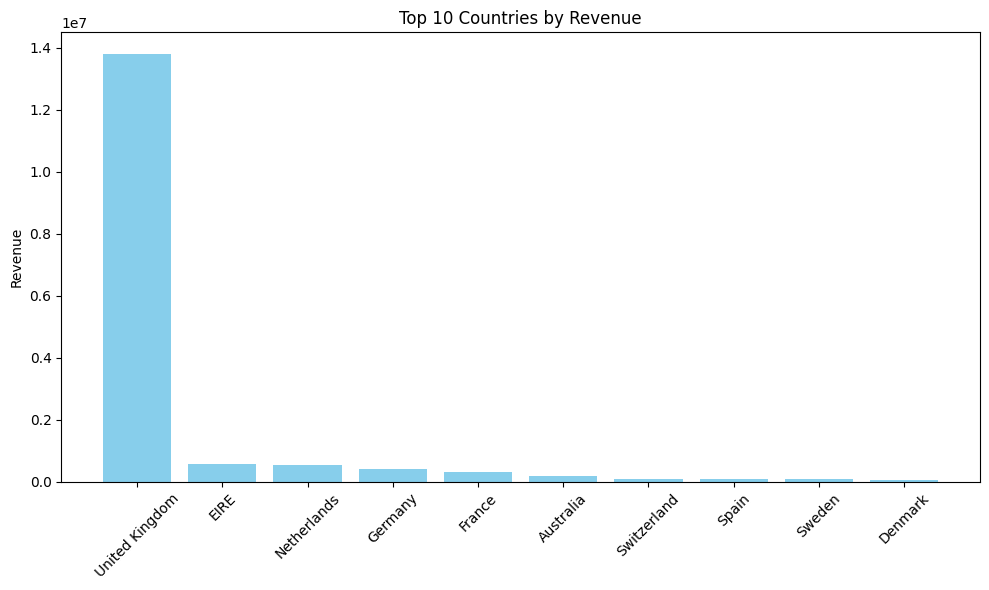

In [79]:
top_10 = top_countries.head(10)

plt.figure(figsize=(10,6))
plt.bar(top_10['Country'], top_10['Revenue'], color='skyblue')
plt.title('Top 10 Countries by Revenue')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## **Inference:**
The United Kingdom overwhelmingly dominates the revenue, contributing nearly 14 million, which is far ahead of all other countries.
Other countries like EIRE, Netherlands, and Germany follow distantly, each contributing under 1 million.
This suggests the business is heavily UK-centric, with international sales making up only a small fraction of total revenue.

In [80]:
retail.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'Price',
       'Customer ID', 'Country', 'Revenue', 'date', 'month', 'year'],
      dtype='object')

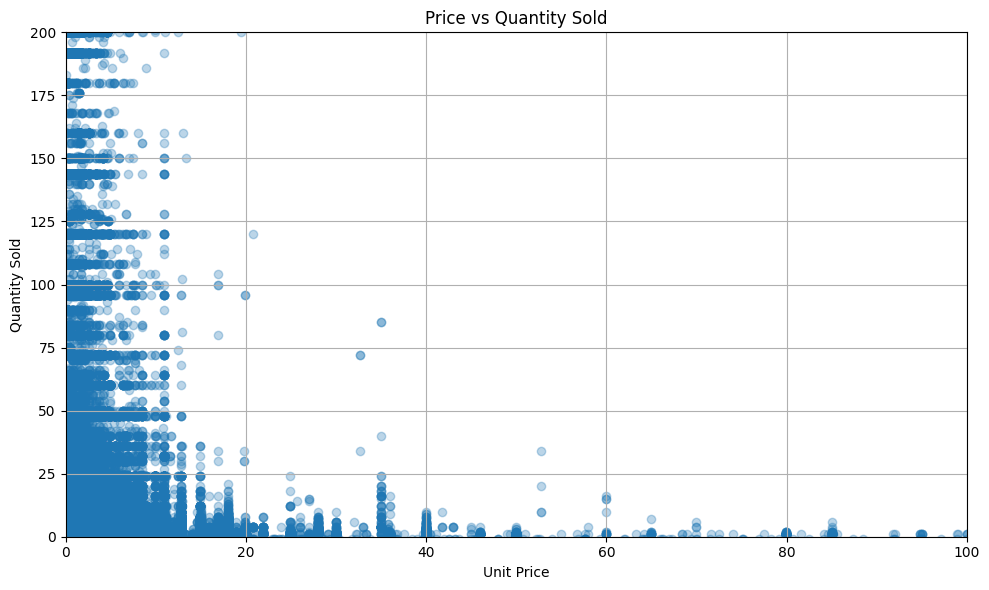

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(retail['Price'], retail['Quantity'], alpha=0.3)
plt.xlabel('Unit Price')
plt.ylabel('Quantity Sold')
plt.title('Price vs Quantity Sold')
plt.grid(True)
plt.xlim(0, 100)     # Optional: focus on realistic price range
plt.ylim(0, 200)     # Optional: limit high quantity outliers
plt.tight_layout()
plt.show()


## ***Inference***
Most high-quantity purchases are for low-priced items, showing an inverse relationship between price and quantity sold. Customers tend to buy affordable products in bulk, while expensive items are purchased less frequently and in smaller quantities.

## **RFM ANALYSIS**

In [82]:
recency_df = retail.groupby('Customer ID').agg(last_date=('date', 'max')).reset_index()
max_date = retail['date'].max()
recency_df['Recency'] = (max_date - recency_df['last_date']).dt.days

In [83]:
frequency_df = retail.groupby('Customer ID').agg(Frequency=('date', 'count')).reset_index()

In [84]:
monetary_df = retail.groupby('Customer ID').agg(Monetary=('Price', 'sum')).reset_index()

In [85]:
rfm = recency_df.merge(frequency_df, on='Customer ID').merge(monetary_df, on='Customer ID')

In [86]:
rfm['R_rank'] = rfm['Recency'].rank(ascending=True)
rfm['F_rank'] = rfm['Frequency'].rank(ascending=False)
rfm['M_rank'] = rfm['Monetary'].rank(ascending=False)

# Normalize the ranks (optional for clustering or scoring)
rfm['R_rank_norm'] = (rfm['R_rank'] / rfm['R_rank'].max()).round(2)
rfm['F_rank_norm'] = (rfm['F_rank'] / rfm['F_rank'].max()).round(2)
rfm['M_rank_norm'] = (rfm['M_rank'] / rfm['M_rank'].max()).round(2)

In [87]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [88]:
rfm_features = rfm[['R_rank_norm', 'F_rank_norm', 'M_rank_norm']]

In [89]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

In [90]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

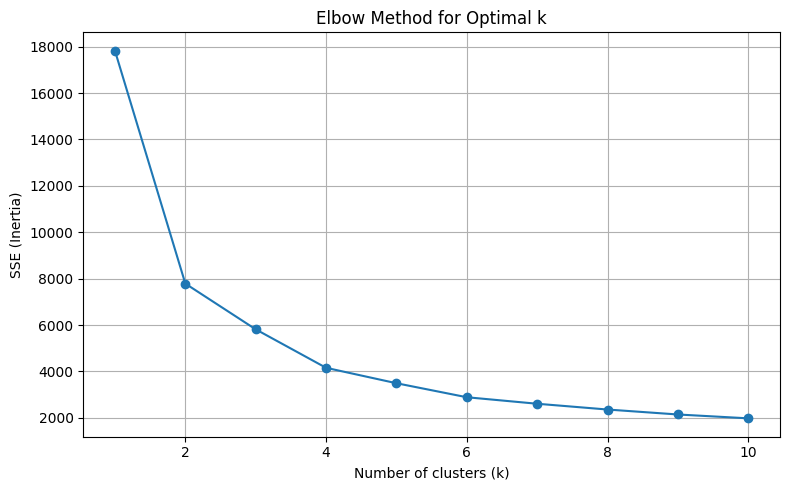

In [91]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [92]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [93]:
rfm_clusters = rfm.copy()

In [94]:
rfm_clusters = rfm_clusters.drop(columns = ['Customer ID','last_date','R_rank',	'F_rank',	'M_rank',	'R_rank_norm',	'F_rank_norm','M_rank_norm'])
rfm_clusters

,Recency,Frequency,Monetary,Cluster
0,400,48,580.44,2
1,0,253,644.16,2
2,1493,51,193.10,3
3,767,180,1504.59,2
4,10600,17,65.30,1
...,...,...,...,...
5937,364,986,1719.75,2
5938,9162,29,116.09,1
5939,5152,12,100.20,1
5940,2591,70,306.55,3


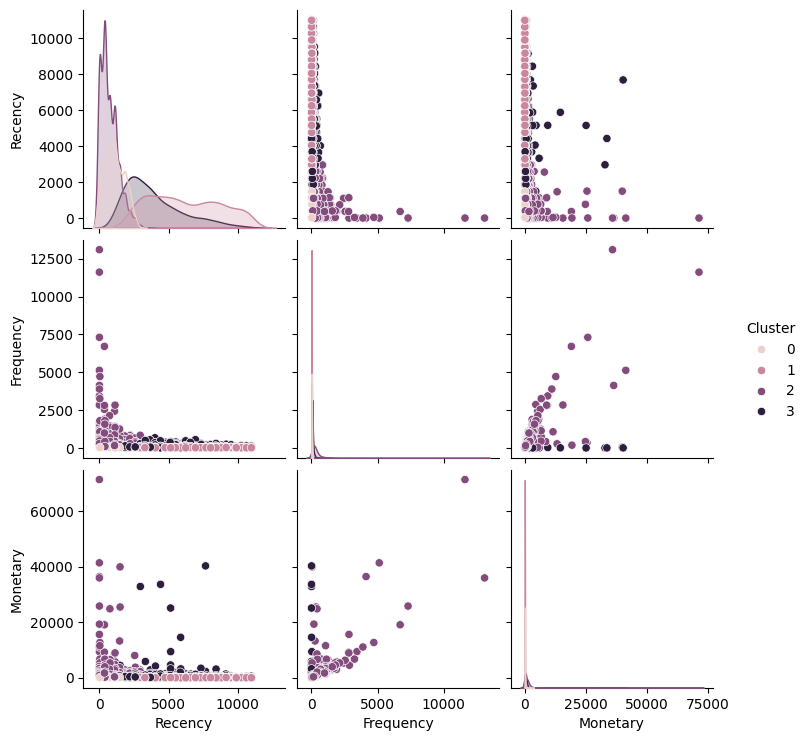

In [95]:
sns.pairplot(data = rfm_clusters, hue = 'Cluster')

### ***Inference:***

The pairplot shows clear separation between customer clusters based on RFM values:

Cluster 3 (darkest) contains customers with high Monetary and Frequency and low Recency, indicating loyal high-value customers.

Cluster 0 is dense with customers who have low Frequency and Monetary, suggesting low-engagement or one-time buyers.

Clusters 1 & 2 represent moderate behavior — average spenders or at-risk customers.

### **Market Basket Analysis**

In [97]:
top_products = retail['Description'].value_counts().nlargest(100).index
mba_subset = retail[retail['Description'].isin(top_products)]

In [98]:
basket = mba_subset.groupby(['Invoice', 'Description'])['Quantity'].sum().unstack().fillna(0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

/tmp/ipython-input-98-1296085354.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


In [100]:
from mlxtend.frequent_patterns import fpgrowth, association_rules

In [101]:
frequent_items = fpgrowth(basket, min_support=0.01, use_colnames=True)

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [102]:
rules = association_rules(frequent_items, metric="lift", min_threshold=1)

In [103]:
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

,antecedents,consequents,support,confidence,lift
0,(WHITE HANGING HEART T-LIGHT HOLDER),(STRAWBERRY CERAMIC TRINKET BOX),0.014291,0.093699,1.651739
1,(STRAWBERRY CERAMIC TRINKET BOX),(WHITE HANGING HEART T-LIGHT HOLDER),0.014291,0.251925,1.651739
2,(WHITE HANGING HEART T-LIGHT HOLDER),(ASSORTED COLOUR BIRD ORNAMENT),0.020220,0.132570,1.602032
3,(ASSORTED COLOUR BIRD ORNAMENT),(WHITE HANGING HEART T-LIGHT HOLDER),0.020220,0.244344,1.602032
4,(REGENCY CAKESTAND 3 TIER),(ASSORTED COLOUR BIRD ORNAMENT),0.012637,0.122061,1.475048
5,(ASSORTED COLOUR BIRD ORNAMENT),(REGENCY CAKESTAND 3 TIER),0.012637,0.152715,1.475048
6,(ASSORTED COLOUR BIRD ORNAMENT),(HOME BUILDING BLOCK WORD),0.011046,0.133484,2.336374
7,(HOME BUILDING BLOCK WORD),(ASSORTED COLOUR BIRD ORNAMENT),0.011046,0.193337,2.336374
8,(WHITE HANGING HEART T-LIGHT HOLDER),(HOME BUILDING BLOCK WORD),0.018410,0.120704,2.112678
9,(HOME BUILDING BLOCK WORD),(WHITE HANGING HEART T-LIGHT HOLDER),0.018410,0.322228,2.112678


## **Inference**
The association rules reveal strong product relationships:

“WHITE HANGING HEART T-LIGHT HOLDER” frequently appears as both antecedent and consequent, showing it's a highly paired item.

Rules with high lift (>2) such as:

“ASSORTED COLOUR BIRD ORNAMENT” → “HOME BUILDING BLOCK WORD”

“HOME BUILDING BLOCK WORD” → “WHITE HANGING HEART T-LIGHT HOLDER”
suggest strong buying patterns, where purchasing one item increases the likelihood of purchasing the other significantly.

These insights can support product bundling and recommendation systems in marketing.